C:\Users\valdi\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


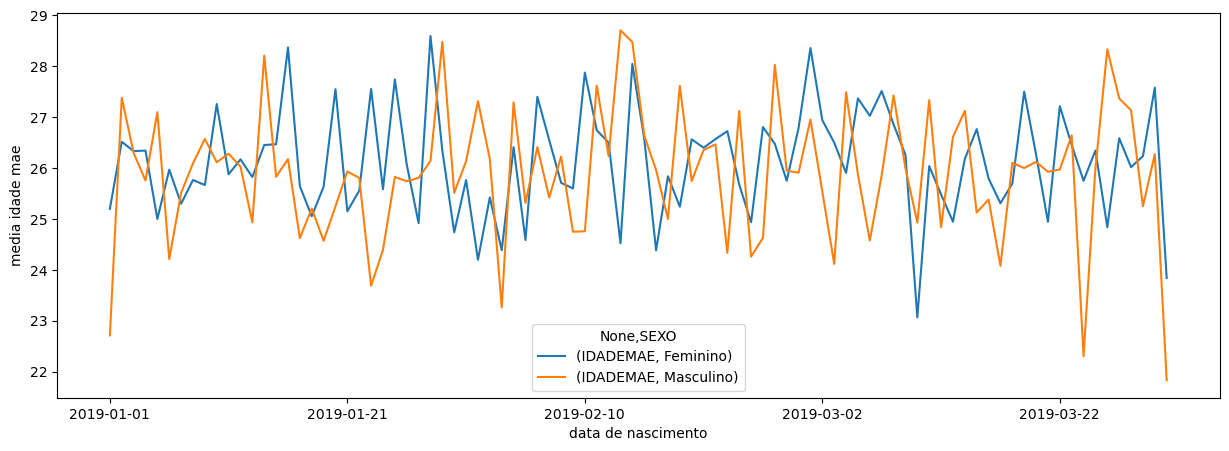

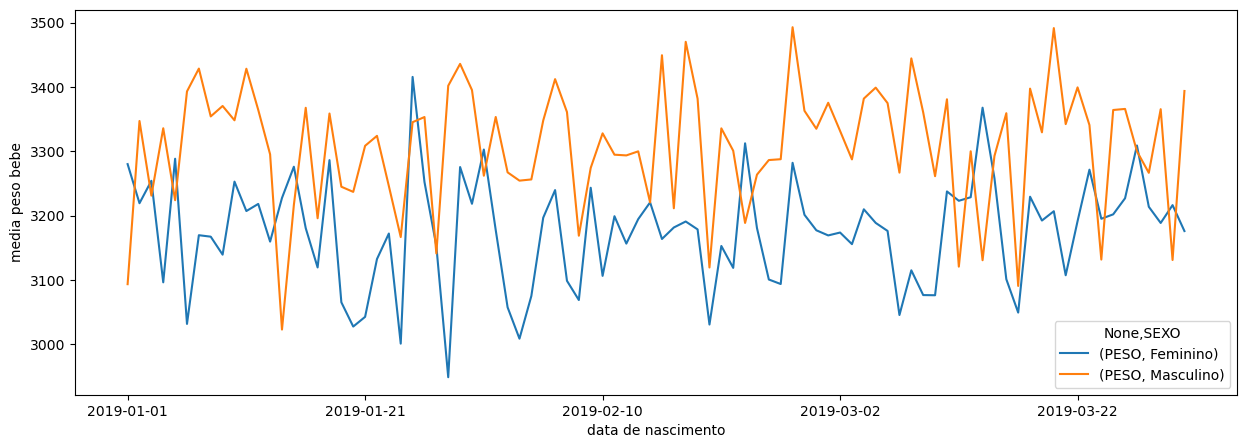

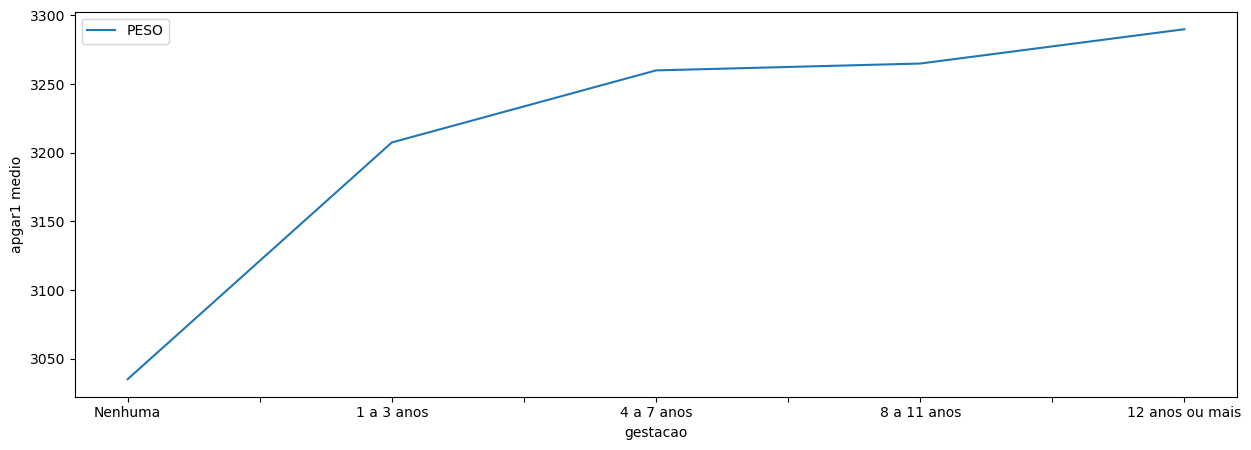

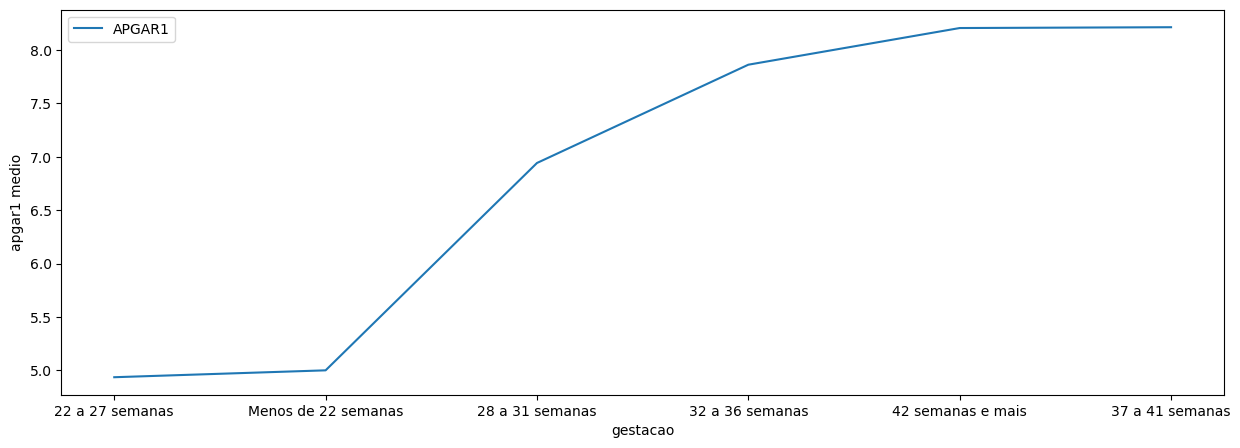

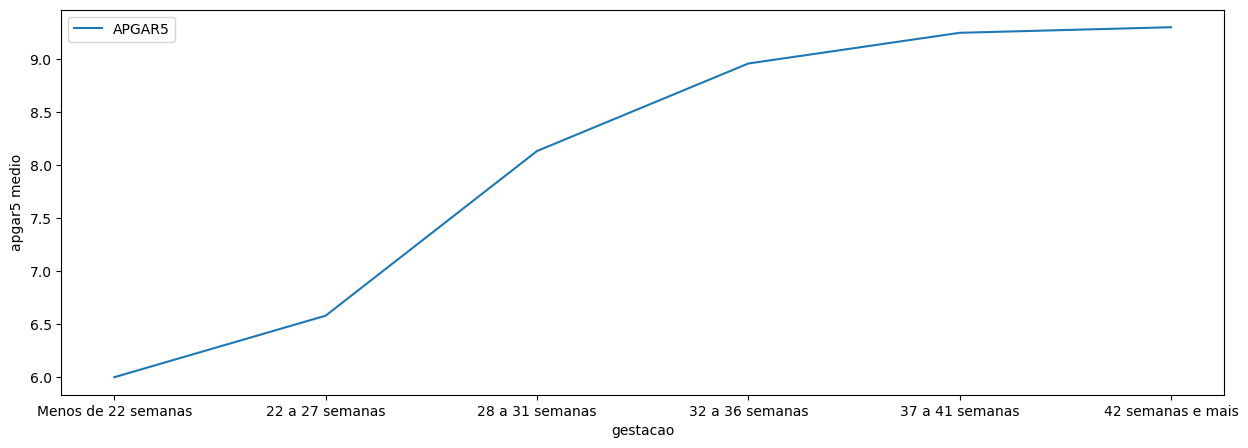

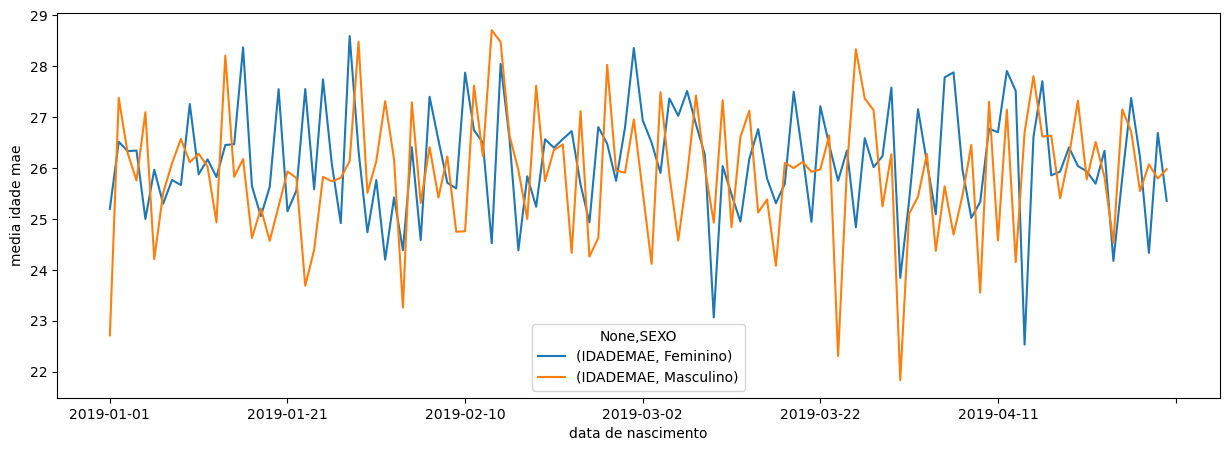

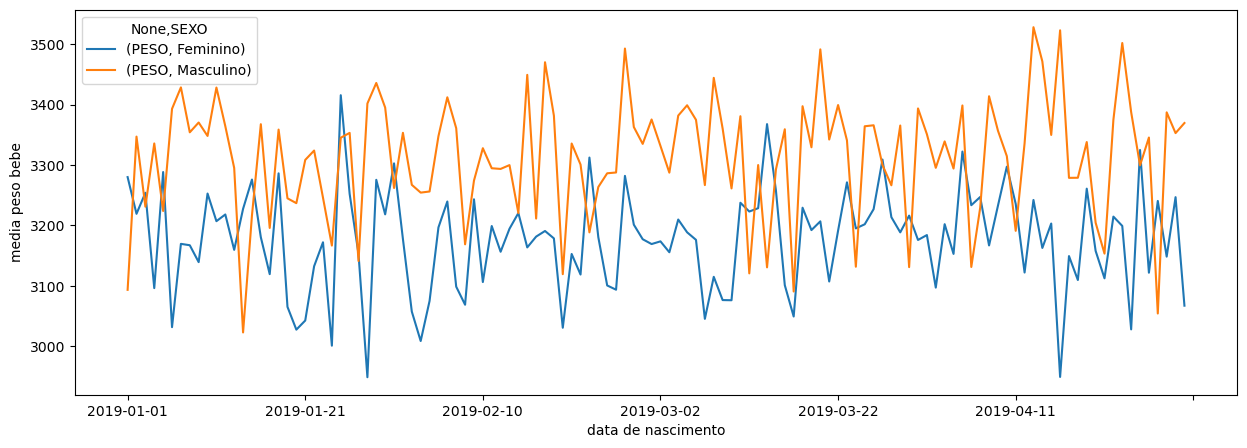

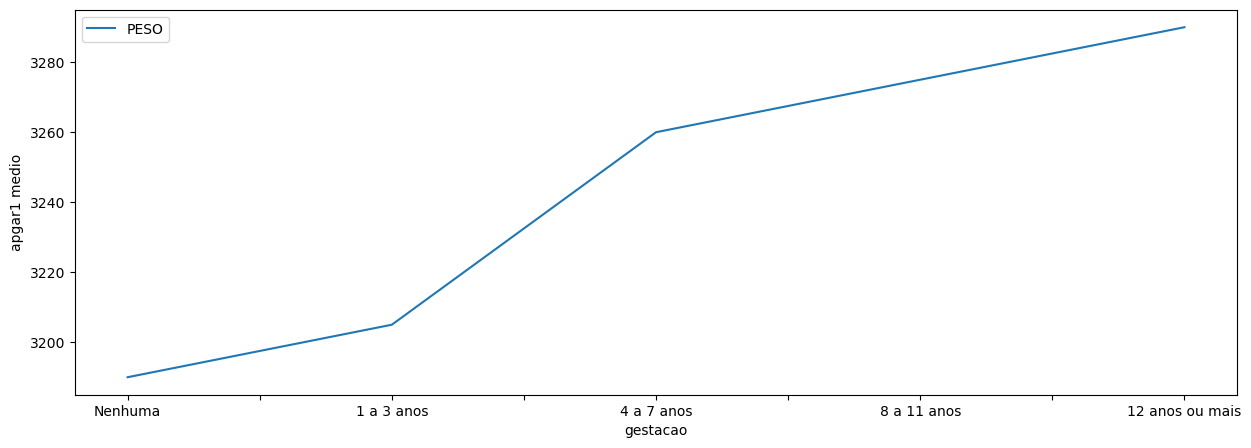

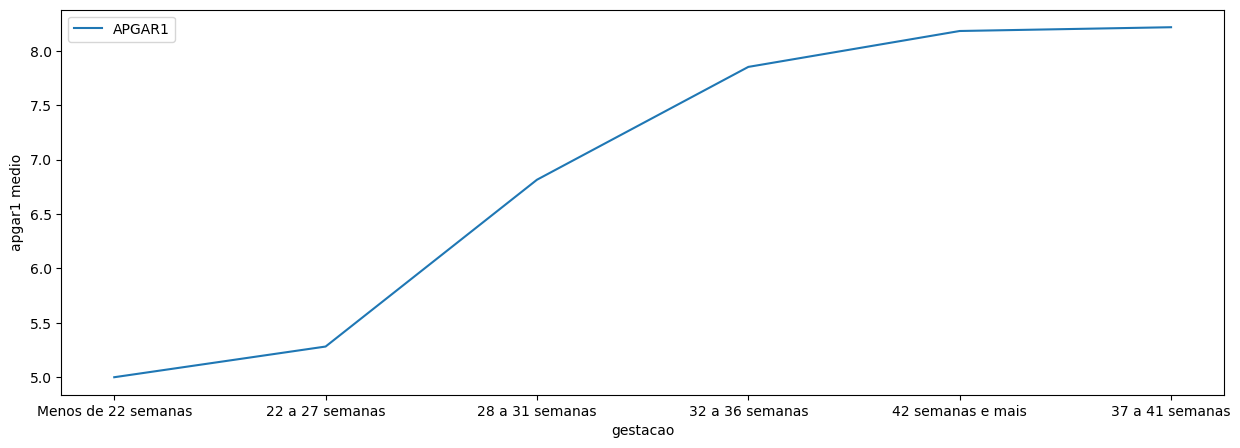

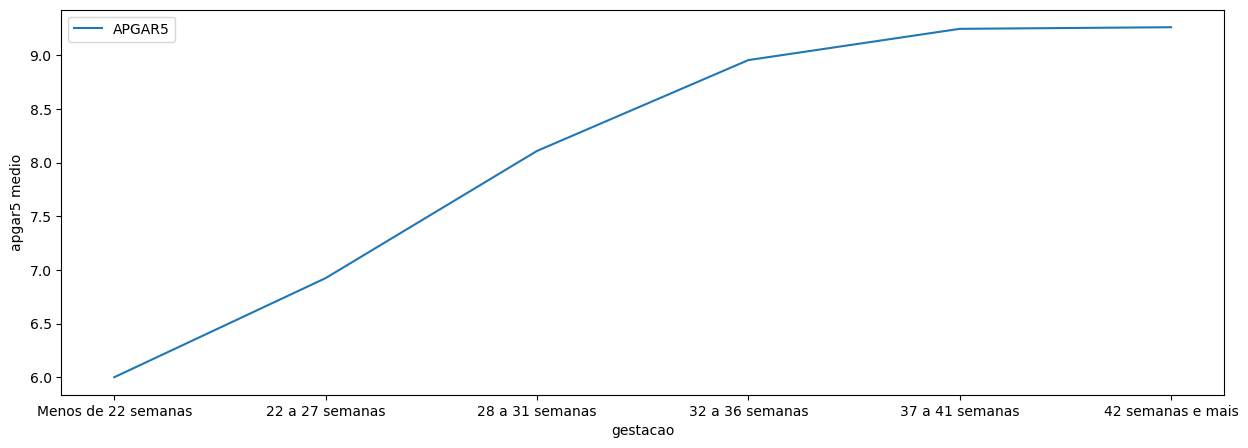

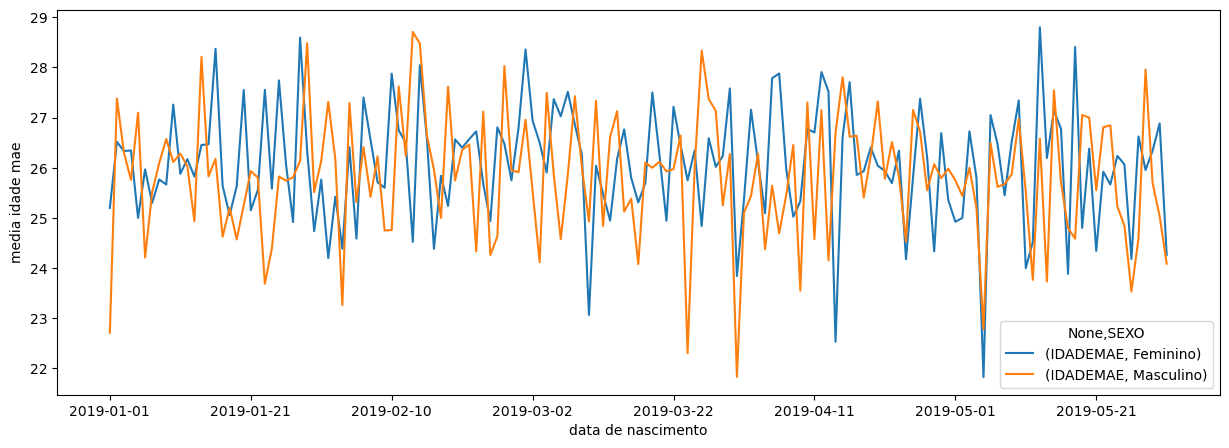

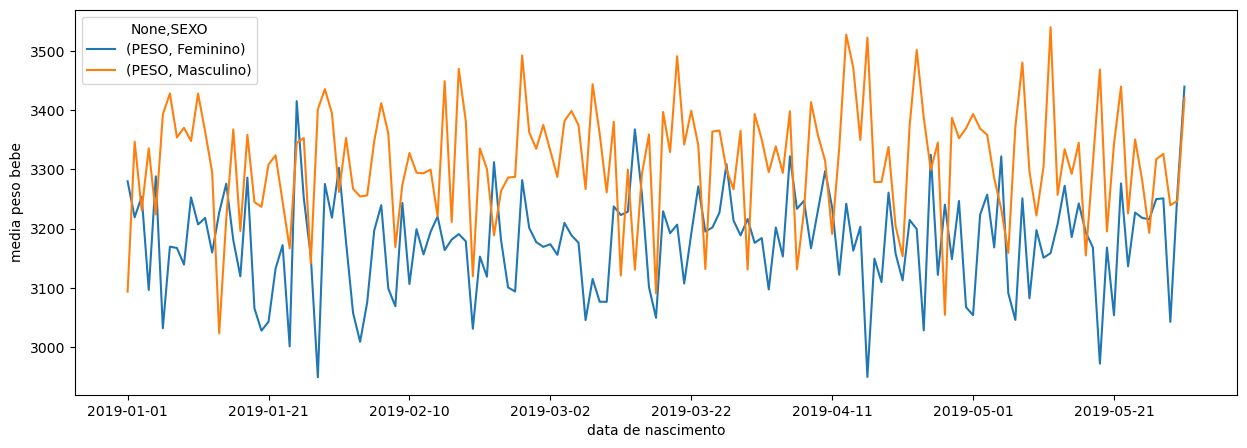

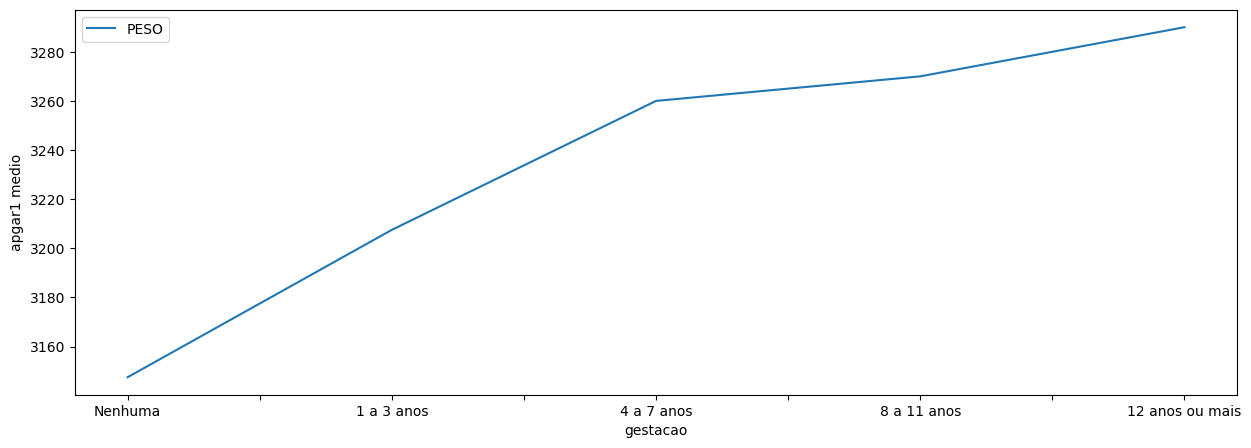

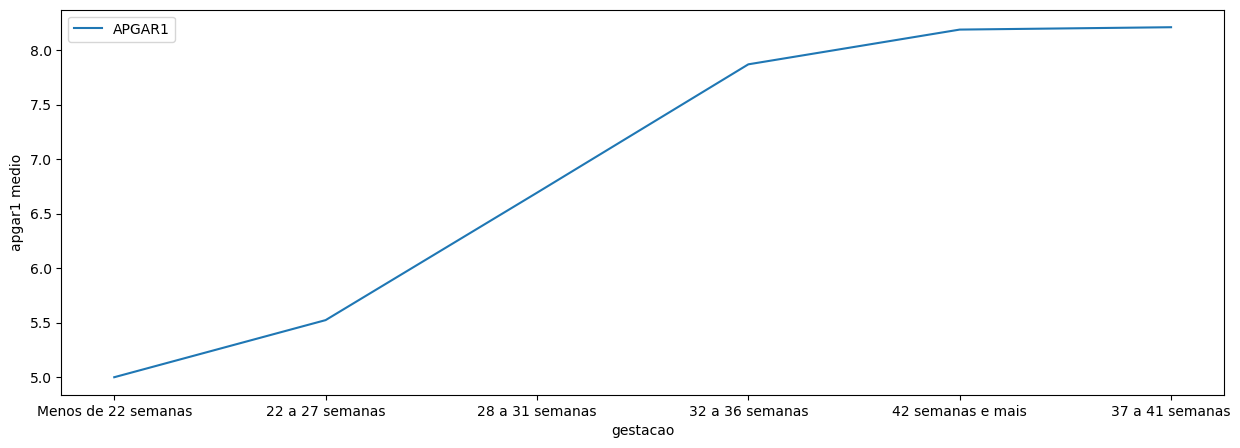

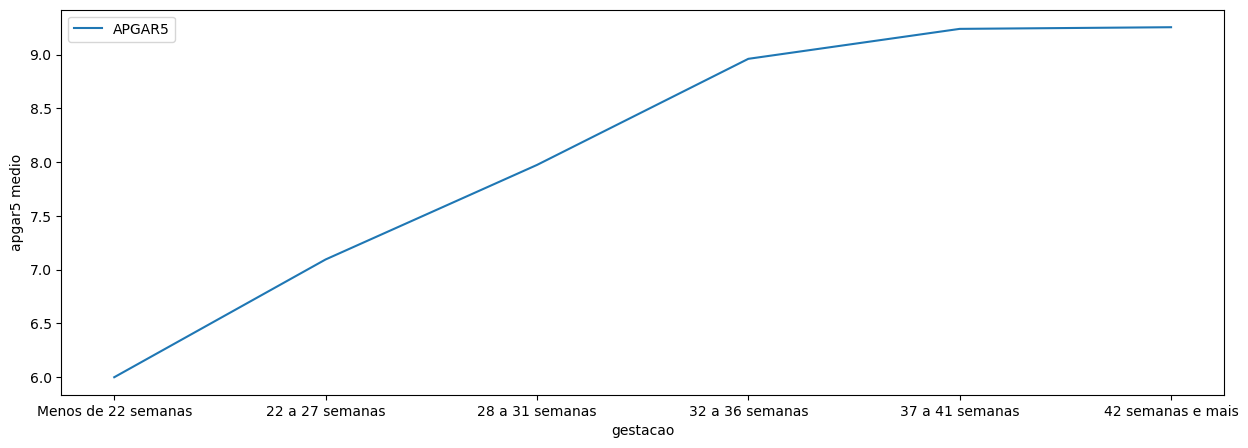

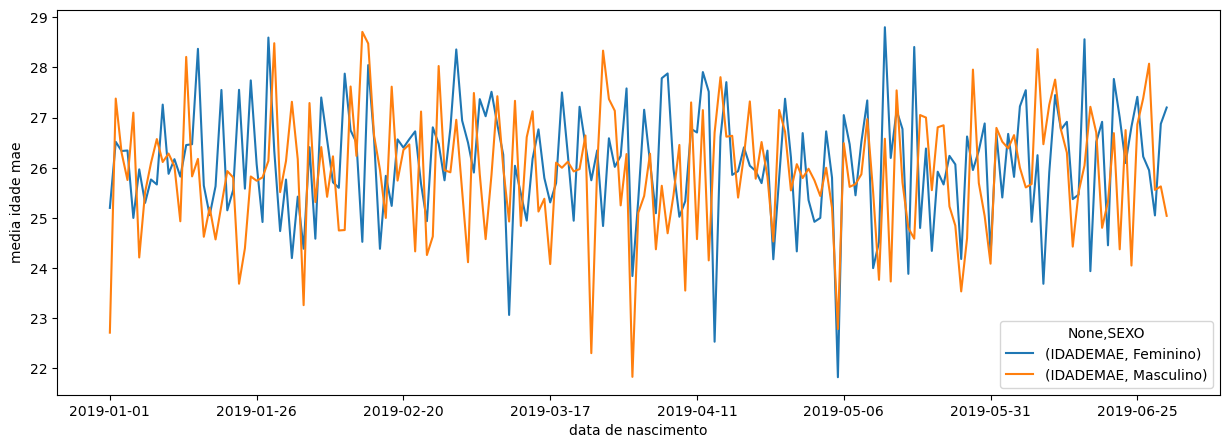

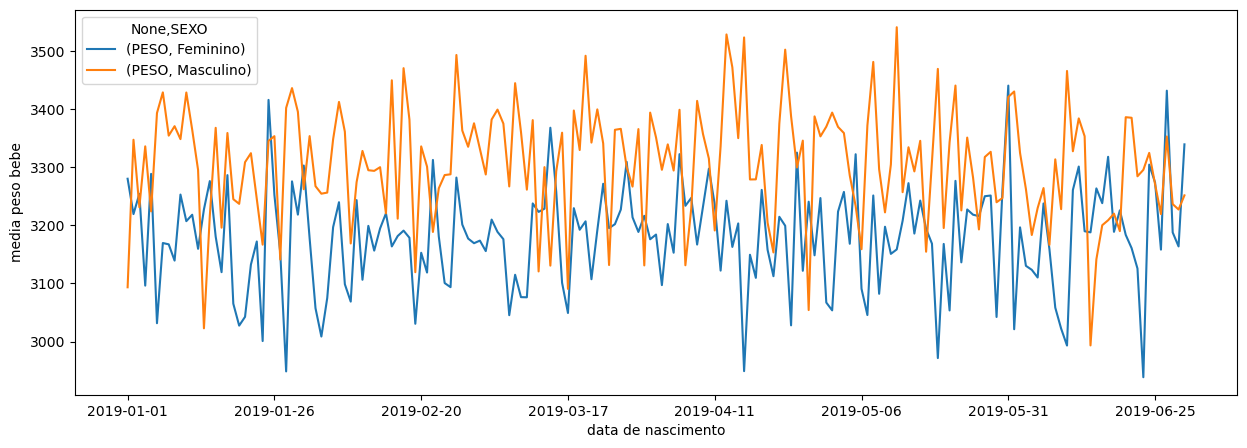

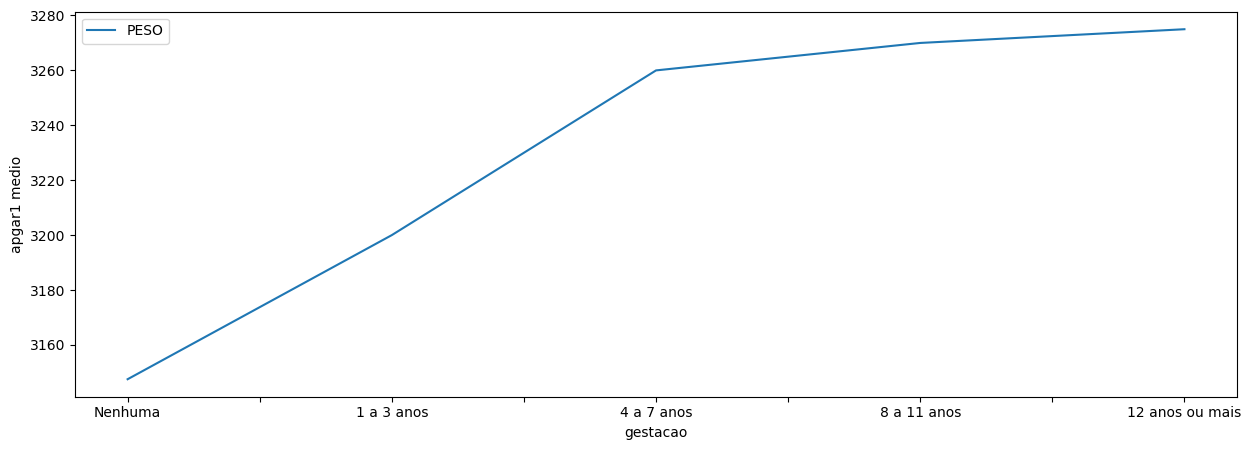

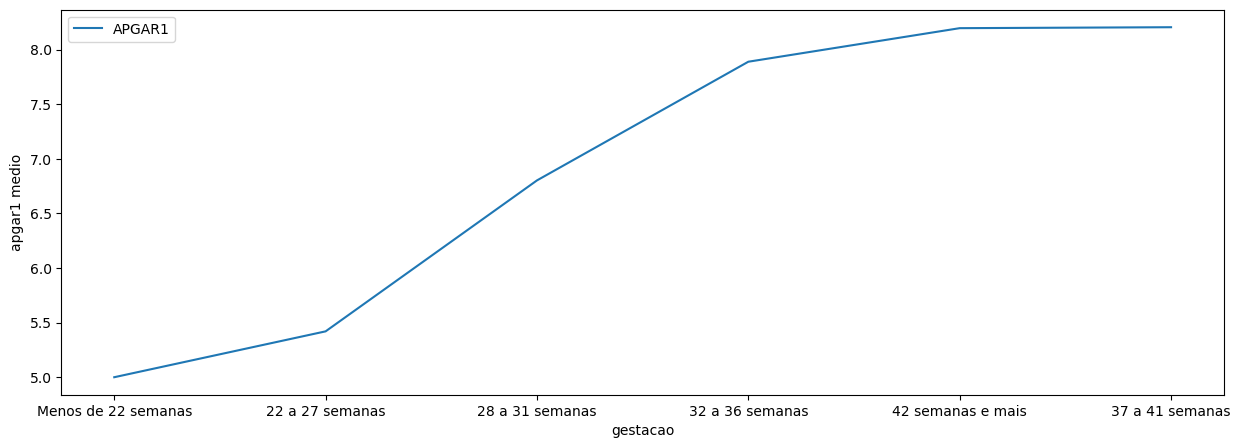

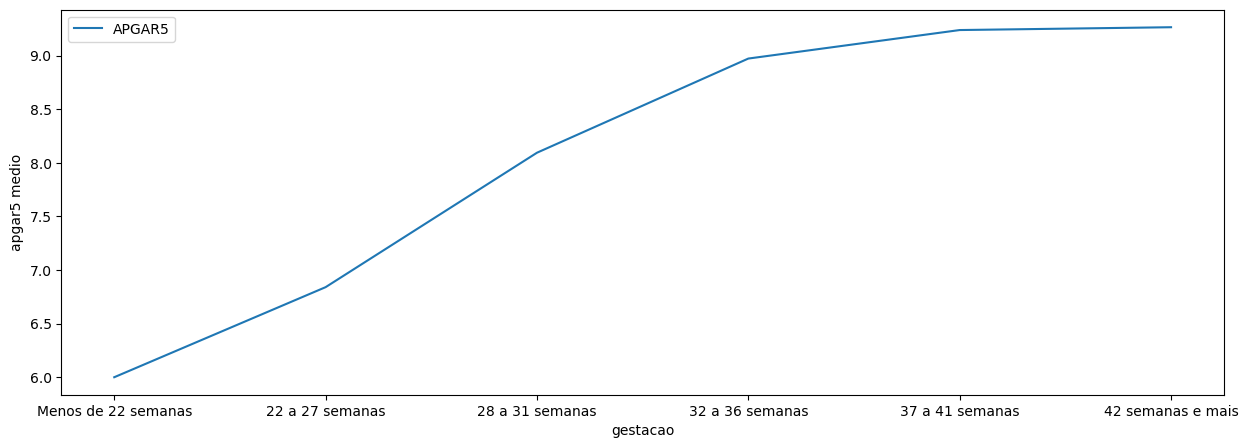

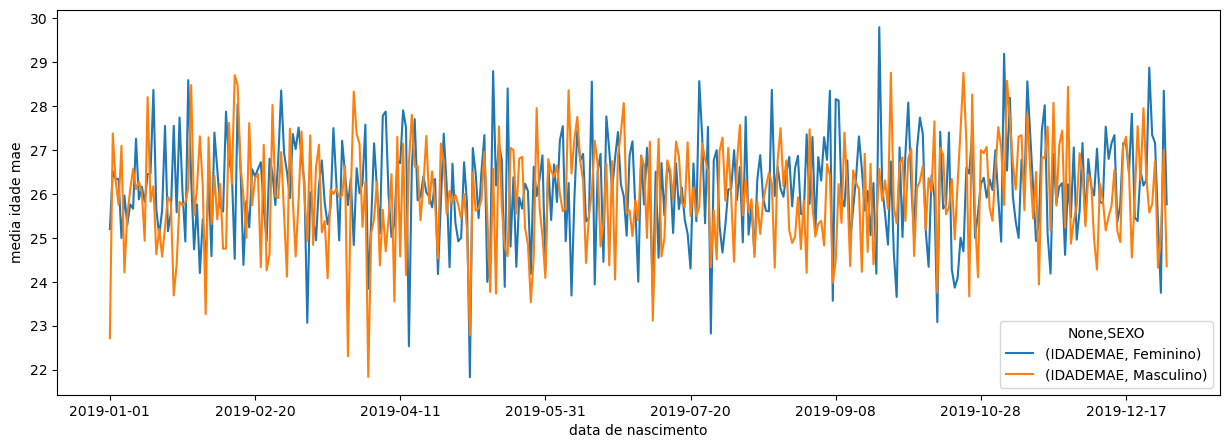

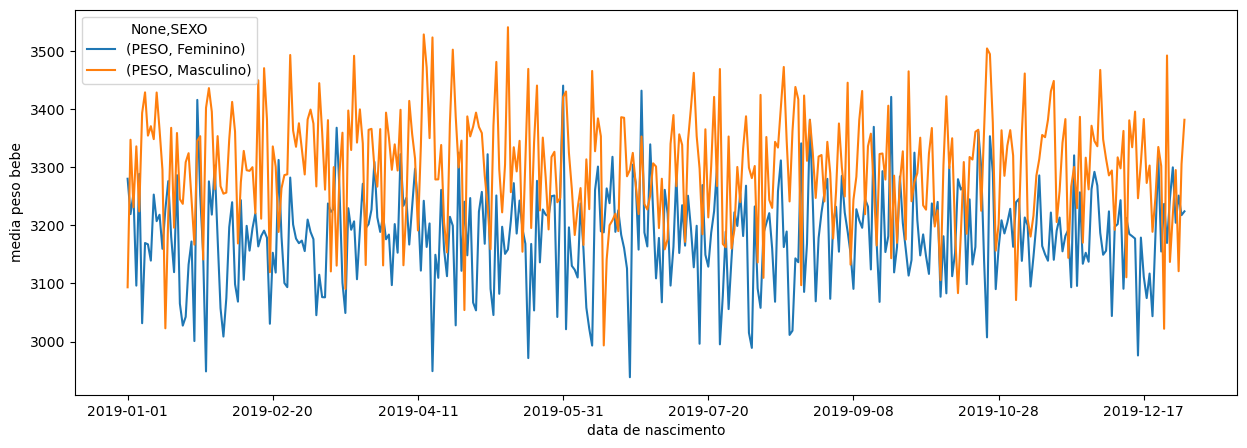

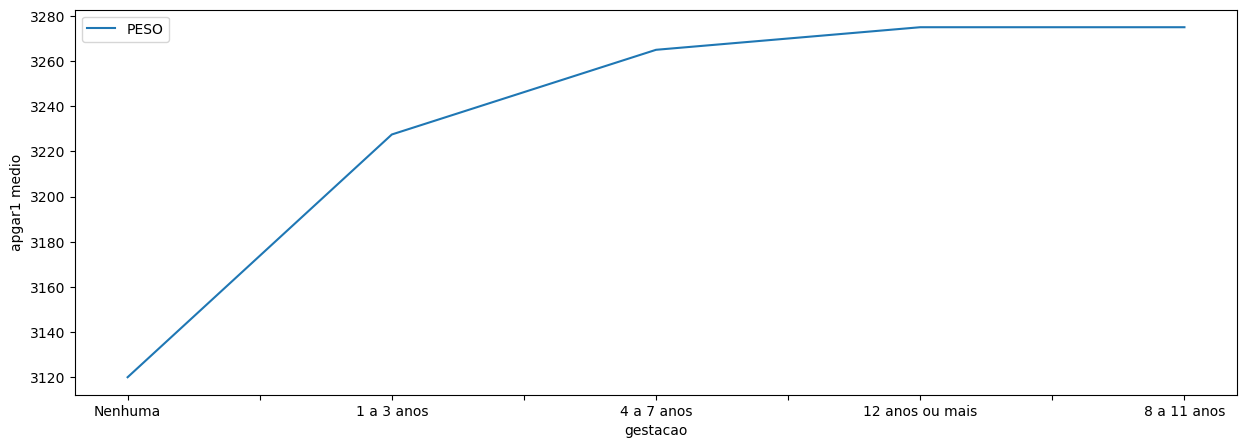

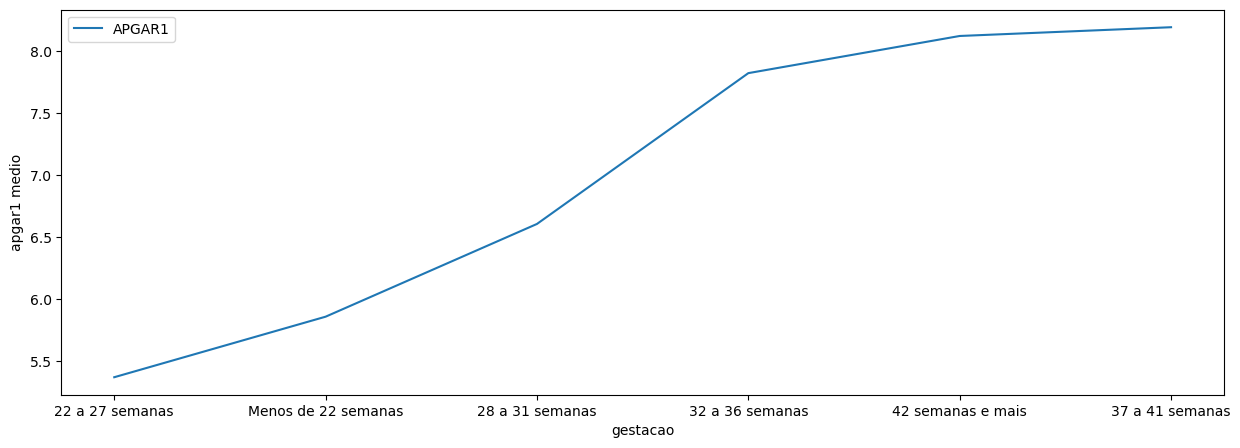

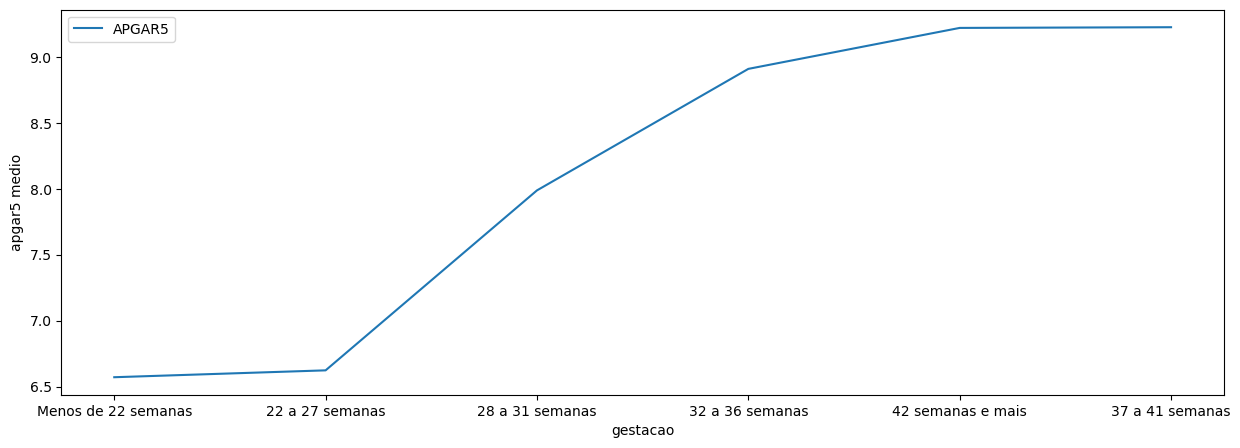

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sinasc = pd.read_csv('SINASC_RO_2019_ABR.csv')

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None



meses = ["MAR", "ABR", "MAI", "JUN", "DEZ"]

for mes in meses:
    
     arquivo = f'SINASC_RO_2019_{mes}.csv'
    
     sinasc = pd.read_csv(arquivo)
     
     max_data = sinasc.DTNASC.max()[:7]
     
     os.makedirs('./output/figs/'+max_data, exist_ok=True)

     plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
     plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')
    
     plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
     plt.savefig('./output/figs/'+max_data+'/media peso bebe por sexo.png')
    
     plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'apgar1 medio','gestacao','sort')
     plt.savefig('./output/figs/'+max_data+'/media apgar1 por escolaridade mae.png')
    
     plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
     plt.savefig('./output/figs/'+max_data+'/media apgar1 por gestacao.png')

     plota_pivot_table(sinasc, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio','gestacao','sort')
     plt.savefig('./output/figs/'+max_data+'/media apgar5 por gestacao.png')
    
    
    


### 2)

- Para automatizar mais a tarefa, poderia ser utilizado arquivos de configuração (JSON/YAML) para parametrizar anos, meses e gráficos, evitando ajustes manuais.